#### Data Processing with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###### IN CASE OF PROBLEMS IMPORTING PACKAGES


In [2]:
# SOLUTION A: select this cell and type Shift-Enter to execute the code below.

%conda install openpyxl pandas seaborn

# Now restart the kernel (Menu -> Kernel -> Restart Kernel)

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - openpyxl
    - pandas
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openpyxl-3.1.5             |  py312h80987f9_0         684 KB
    ------------------------------------------------------------
                                           Total:         684 KB

The following packages will be UPDATED:

  openpyxl                            3.1.2-py312h80987f9_0 --> 3.1.5-py312h80987f9_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
# SOLUTION B: select this cell and type Shift-Enter to execute the code below.

%pip install xlrd openpyxl seaborn

# Now restart the kernel (Menu -> Kernel -> Restart Kernel)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 799.3 kB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


<hr>

Run the following cell to rebuild the three `DataFrames`:

In [4]:

# countries
countries = pd.read_excel("data_geographies_v1.xlsx", sheet_name = "list-of-countries-etc")

# co2
data = pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")
co2 = data.melt(id_vars=['country'], var_name='year', value_name='kt')
co2.dropna(inplace=True)
co2["year"] = co2["year"].astype(int)

# stats97
data = pd.read_csv('stats_1997.csv', header=None)
df = data[0].str.split('-', expand=True)
df.columns = ['geo','statistic']
df['value'] = data[1]
stats97 = df.pivot(index='geo',columns='statistic',values='value')


# 5. Manipulating Data

In this notebook, we will look at some more of pandas's data-handling tools.

***
## 5.1 Joining tables

To compare emissions between countries in a fair way, it would make sense to convert them to a per-capita basis. 
Let's start with the figures for 1997 to see how this can be done.

First we will make a new dataframe containing only the 1997 emissions:

In [5]:

co2_1997 = co2.query('year==1997')
co2_1997


,country,year,kt
47232,Afghanistan,1997,1100.0
47233,Albania,1997,1540.0
47234,Algeria,1997,87300.0
47235,Andorra,1997,466.0
47236,Angola,1997,7380.0
...,...,...,...
47419,Venezuela,1997,134000.0
47420,Vietnam,1997,45100.0
47421,Yemen,1997,13400.0
47422,Zambia,1997,2390.0


However, the population data is not yet in the co2 dataframe, so we will need to look it up from another dataframe by matching the country name. 

This type of **relational data**, where information must be collected from multiple tables, requires careful handling to make sure that rows in different tables are correctly associated with each other. The country name acts as a **key** to unlock the correct data from the associated table.

The relevant population data is in the stats97 table: 

In [6]:

stats97


statistic,gdp,pop
geo,,
afg,NaN,18400000.0
ago,2.570000e+10,15100000.0
alb,5.470000e+09,3090000.0
and,2.400000e+09,64300.0
are,1.730000e+11,2700000.0
...,...,...
wsm,4.330000e+08,172000.0
yem,1.740000e+10,16400000.0
zaf,2.490000e+11,43700000.0


However, this is indexed by the `geo` code, rather than the `country` name that we find in `co2_1997`. Fortunately, the `countries` table contains both:

In [7]:
countries.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


Taking the `co2_1997` data, we apply a `join()` to relate its `country` variable to the `name` variable in `countries`.

To do this, we need to set these columns as the index in each table

In [8]:
a = co2_1997.set_index('country')
b = countries.set_index('name')
c = a.join(b)
c.head()


,year,kt,geo,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
country,,,,,,,,,,,,
Afghanistan,1997,1100.0,afg,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
Albania,1997,1540.0,alb,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
Algeria,1997,87300.0,dza,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
Andorra,1997,466.0,and,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
Angola,1997,7380.0,ago,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


For every row in the table `a`, `join()` tries to match its index with a row index in `b`. 
The resulting table imports the additional columns from the `countries` tibble, so now we can associate each `geo` code with the correct CO2 emissions.

`join()` is just one of several pandas methods for working with relational data.


#### Exercise {-}

Use another `join()` to connect `c` to `stats97`.

*Hint*: you can move the current index column back into the body of the DataFrame using the method [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas.DataFrame.reset_index)

In [9]:
c = c.reset_index()
d = c.set_index('geo')
data_97 = d.join(stats97)
data_97.head()

,country,year,kt,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017",gdp,pop
geo,,,,,,,,,,,,,,
afg,Afghanistan,1997,1100.0,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income,NaN,18400000.0
alb,Albania,1997,1540.0,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income,5.470000e+09,3090000.0
dza,Algeria,1997,87300.0,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income,9.810000e+10,29900000.0
and,Andorra,1997,466.0,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income,2.400000e+09,64300.0
ago,Angola,1997,7380.0,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income,2.570000e+10,15100000.0


#### Exercise {-}

Calculate the per-capita emissions for 1997 as a new column and plot these on a histogram.

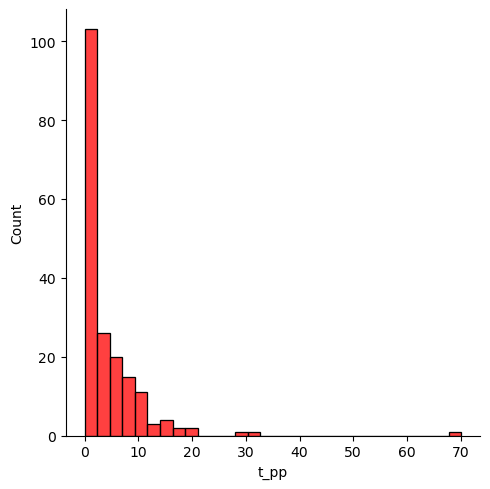

In [10]:
data_97['t_pp'] = 1000 * data_97['kt']/data_97['pop'] 

sns.displot(data_97['t_pp'],  
            bins=30, 
            color='red')
plt.show()

#### Exercise {-}

The file `population_total.csv` contains (real or predicted) population data for each country for the years 1800-2100.

Write a workflow to construct a new DataFrame `co2_pp` containing the following columns:

* country
* year
* kt = total CO2 emissions (in kilotonnes)
* pop = total population
* t_pp = per-capita CO2 emissions (in tonnes)



In [18]:
# load population data
data = pd.read_csv("population_total.csv")
population = data.melt(id_vars=['country'], var_name='year', value_name='pop')
population.dropna(inplace=True)
population["year"] = population["year"].astype(int)

# join with the co2 table
a = co2.set_index(['country','year'])
b = population.set_index(['country','year'])
co2_pp = a.join(b)
co2_pp = co2_pp.dropna()
co2_pp = co2_pp.reset_index()

# add the new column
co2_pp['t_pp'] = 1000 * co2_pp['kt'] / co2_pp['pop']
co2_pp.head()


,country,year,kt,pop,t_pp
0,Canada,1800,3.67,646000.0,0.005681
1,Germany,1800,796.00,22900000.0,0.034760
2,Poland,1800,407.00,9510000.0,0.042797
3,United Kingdom,1800,26700.00,12300000.0,2.170732
4,United States,1800,253.00,6800000.0,0.037206


***

## 5.2 Summarising data across groups

Cases often belong to distinct groups that we want to compare with each other in some way.


#### Exercise {-}

Using the output of the previous exercise and the `countries` dataframe, add a column for  the `eight_regions` grouping.

In [12]:
a = countries[['name','eight_regions']]
a.columns = ['country','eight_regions']
a = a.set_index('country')
co2_pp = (co2_pp.set_index('country')).join(a).reset_index()
co2_pp.head()

,country,year,kt,pop,t_pp,eight_regions
0,Canada,1800,3.67,646000.0,0.005681,america_north
1,Germany,1800,796.00,22900000.0,0.034760,europe_west
2,Poland,1800,407.00,9510000.0,0.042797,europe_west
3,United Kingdom,1800,26700.00,12300000.0,2.170732,europe_west
4,United States,1800,253.00,6800000.0,0.037206,america_north


## Box plots

Let's look at the data for 2014 only. Here's a more complex visualisation of the data:

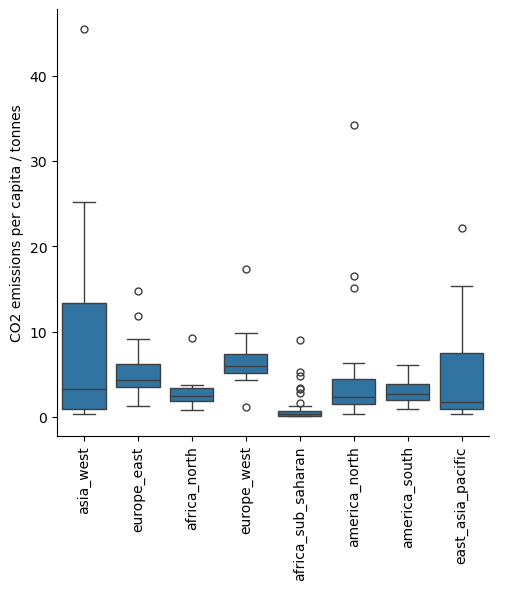

In [13]:
d = co2_pp.query('year==2014')
g = sns.catplot(x="eight_regions",y="t_pp",data=d,kind="box")
g.set_axis_labels("", "CO2 emissions per capita / tonnes")
g.set_xticklabels(rotation=90)
plt.show()

## groupby()

Pandas allows you to define groups of rows to construct summary statistics for each group:

In [14]:
grouped = d.groupby("eight_regions")

In [15]:
grouped['t_pp'].median()

eight_regions
africa_north          2.397515
africa_sub_saharan    0.310398
america_north         2.283019
america_south         2.616189
asia_west             3.259804
east_asia_pacific     1.709476
europe_east           4.307932
europe_west           5.937240
Name: t_pp, dtype: float64

##### *Exercise*

Plot the total global CO2 emissions for each year.


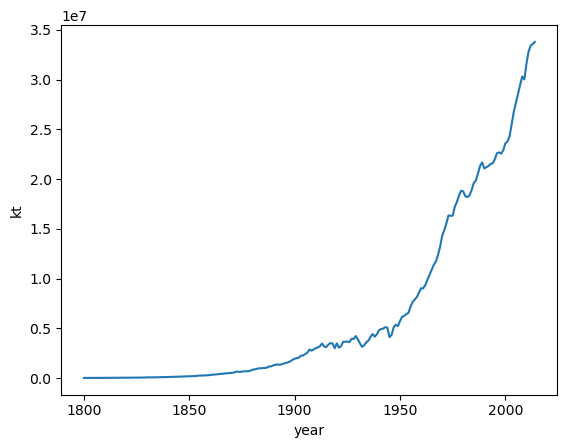

In [16]:
grouped = co2_pp.groupby("year")
data = grouped['kt'].sum()
sns.lineplot(data)
plt.show()

##### *Exercise*

Plot the yearly median per-capita CO2 emissions for the eight regions, from 1950 onwards.


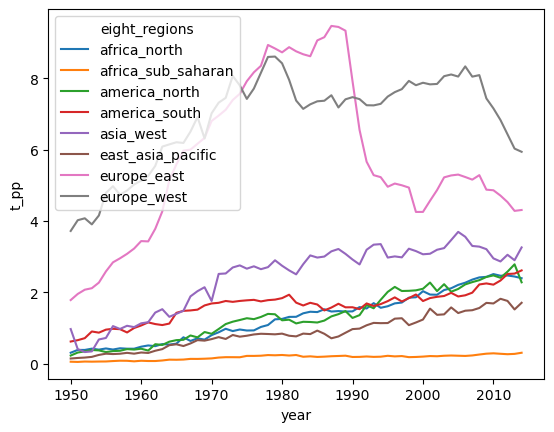

In [17]:
df = co2_pp.query("year >= 1950")
grouped = df[['year','eight_regions','t_pp']].groupby(['year','eight_regions'])
data = grouped.median()
data = data.reset_index()
sns.lineplot(x='year',y='t_pp', hue='eight_regions', data=data)
plt.show()

***